In [165]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("./mouse_drug_data.csv")
clinical_data = pd.read_csv("./clinicaltrial_data.csv")

# Combine the data into a single dataset
pymaceuticals = pd.merge(clinical_data,mouse_drug_data,how='left',on ="Mouse ID")


# Display the data table for preview
pymaceuticals.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [167]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumour_mean = pymaceuticals.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
TMean = pd.DataFrame(Tumour_mean.reset_index())

# Renamed the tumour volume column to mean tumour volume to avoid confusion
TMean_data = TMean.rename(columns={"Tumor Volume (mm3)": "Mean TumorVol(mm3)"})
TMean_data.head()

,Drug,Timepoint,Mean TumorVol(mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [168]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumour_SE = pymaceuticals.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Converts to DataFrame
TumourSE_df = pd.DataFrame(Tumour_SE).reset_index()

# Renamed the tumour volume column to mean tumour volume to avoid confusion
TumourSE_data = TumourSE_df.rename(columns={"Tumor Volume (mm3)": "SE TumorVol(mm3)"})

# Preview DataFrame
TumourSE_data.head()

,Drug,Timepoint,SE TumorVol(mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [169]:
# Minor Data Munging to Re-Format the Data Frames
TMean_pivot = TMean_data.pivot_table(index="Timepoint",columns="Drug",values="Mean TumorVol(mm3)")
TMean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [170]:
TumourSE_format = TumourSE_data.pivot_table(index="Timepoint",columns="Drug",values="SE TumorVol(mm3)")
TumourSE_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


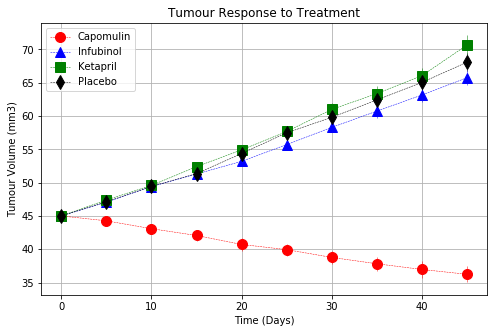

In [171]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
plt.figure(figsize=(8,5))

plt.errorbar(TMean_pivot.index, TMean_pivot["Capomulin"], yerr=TumourSE_format["Capomulin"],linewidth=0.50,color="r", \
             marker="o", markersize=10,linestyle="dashed")
plt.errorbar(TMean_pivot.index, TMean_pivot["Infubinol"], yerr=TumourSE_format["Infubinol"],linewidth=0.50,color="b", \
             marker="^", markersize=10,linestyle="dashed")
plt.errorbar(TMean_pivot.index, TMean_pivot["Ketapril"],yerr=TumourSE_format["Ketapril"], linewidth=0.50,color="g", \
             marker="s", markersize=10,linestyle="dashed")
plt.errorbar(TMean_pivot.index, TMean_pivot["Placebo"],yerr=TumourSE_format["Placebo"], linewidth=0.50,color="k", \
             marker="d", markersize=10,linestyle="dashed")
plt.grid()
plt.title("Tumour Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumour Volume (mm3)")
plt.legend(loc="upper left")
# Saves and shows the Figure
plt.savefig("Tumour_Response_to_Treatment_plot.png")
plt.show()

## Metastatic Response to Treatment

In [172]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = pymaceuticals.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(metastatic_mean)
# Preview DataFrame
meta_mean_df.reset_index(inplace=True)


In [173]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_SE = pymaceuticals.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meta_SE = pd.DataFrame(metastatic_SE)

# Preview DataFrame
meta_SE.reset_index(inplace=True)

In [174]:
# Minor Data Munging to Re-Format the Data Frames
MetaMean_pivot = meta_mean_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")
MetaMean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [184]:
# Minor Data Munging to Re-Format the Data Frames
meta_SE_pivot = meta_SE.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
meta_SE_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


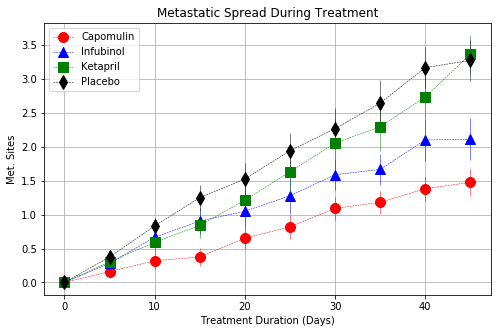

In [176]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
plt.figure(figsize=(8,5))

plt.errorbar(MetaMean_pivot.index, MetaMean_pivot["Capomulin"], yerr=meta_SE_pivot["Capomulin"], linewidth=0.50,color="r",\
             marker="o", markersize=10, linestyle="dashed")
plt.errorbar(MetaMean_pivot.index, MetaMean_pivot["Infubinol"], yerr=meta_SE_pivot["Infubinol"], linewidth=0.50,color="b",\
             marker="^", markersize=10, linestyle="dashed")
plt.errorbar(MetaMean_pivot.index, MetaMean_pivot["Ketapril"],yerr=meta_SE_pivot["Ketapril"], linewidth=0.50,color="g",\
             marker="s", markersize=10, linestyle="dashed")
plt.errorbar(MetaMean_pivot.index, MetaMean_pivot["Placebo"],yerr=meta_SE_pivot["Placebo"], linewidth=0.50,color="k", \
             marker="d", markersize=10, linestyle="dashed")

plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")
# Saves and shows the Figure
plt.savefig("Metastatic_Spread.png")
plt.show()



## Survival Rates

In [177]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = pymaceuticals.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
Mice_data = pd.DataFrame(mice_count)
# Preview DataFrame
Mice_renamed = Mice_data.rename(columns={"Mouse ID": "Mice Count"})

Mice_renamed.reset_index(inplace=True)

In [178]:
# Minor Data Munging to Re-Format the Data Frames
Mice_data_pivot = Mice_renamed.pivot(index="Timepoint",columns ="Drug",values= "Mice Count")
# Preview the Data Frame
Mice_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [179]:
#Gets Percentages
Mice_percents = (Mice_data_pivot["Capomulin"] / 25)* 100 

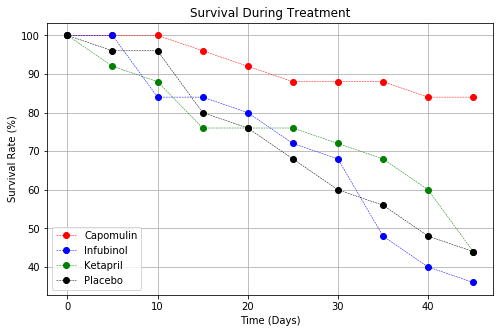

In [180]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(8,5))
plt.errorbar(Mice_data_pivot.index,(Mice_data_pivot["Capomulin"] / 25)* 100,color="r", marker="o", \
             linestyle="dashed", linewidth=0.50)
plt.errorbar(Mice_data_pivot.index,(Mice_data_pivot["Infubinol"] / 25)* 100,color="b", marker="o", \
             linestyle="dashed", linewidth=0.50)
plt.errorbar(Mice_data_pivot.index,(Mice_data_pivot["Ketapril"] / 25)* 100,color="g", marker="o", \
             linestyle="dashed", linewidth=0.50)
plt.errorbar(Mice_data_pivot.index,(Mice_data_pivot["Placebo"] / 25)* 100,color="k", marker="o", \
             linestyle="dashed", linewidth=0.50)
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
# Save the Figure

# Show the Figure
plt.show()


## Summary Bar Graph

In [181]:
# Calculate the percent changes for each drug
Mice_renamed.reset_index()
first_count = TMean_data.groupby("Drug")["Mean TumorVol(mm3)"].first()
last_count = TMean_data.groupby("Drug")["Mean TumorVol(mm3)"].last()
percent_change = ((last_count-first_count)/first_count) * 100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Mean TumorVol(mm3), dtype: float64

In [182]:
# Store all Relevant Percent Changes into a Tuple
Change_tuple = list(percent_change_df[["Mean TumorVol(mm3)"]].itertuples(index=False, name=None))
drug_tuple = list(percent_change_df.index)
Change_tuple
drug_tuple


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

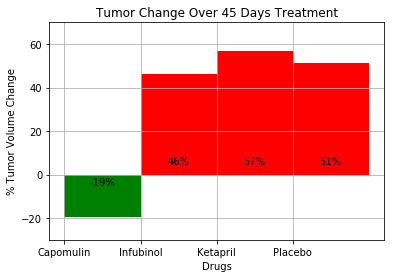

In [183]:
# Splice the data between passing and failing drugs
drug_pass = percent_change >= 0

plot_list = ['Capomulin','Infubinol','Ketapril','Placebo']
x_axis  = np.arange(len(plot_list))
y_axis = [percent_change[0],percent_change[2],percent_change[3],percent_change[5]]
# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,plot_list)
bar_plot = plt.bar(x_axis,y_axis,color=drug_pass.map({True:"r",False: "g"}),align='edge',width = 1)
plt.grid()
plt.ylim(-30,70)
plt.title("Tumor Change Over 45 Days Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes
def label(bars):
    for bar in bars:
        height = bar.get_height()
        h_format = "{0:.0f}%".format(bar.get_height())
        if height > 0:
            position = 5
        else:
            position = -5
   
        plt.text(bar.get_x() + bar.get_width()/2, position,h_format,ha='center')
                

# Call functions to implement the function calls
label(bar_plot)

# Save the Figure
plt.savefig("Tumor_Change_over_Treatment.png")
 